# Importing Libraries

In [11]:


import os, sys, random, shutil
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import cv2

In [12]:
import argparse
import sys
from pathlib import Path

import cv2
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
%matplotlib inline 

from models.experimental import attempt_load
from utils.datasets import LoadImages, LoadStreams
from utils.general import apply_classifier, check_img_size, check_imshow, check_requirements, check_suffix, colorstr, \
    increment_path, non_max_suppression, print_args, save_one_box, scale_coords, set_logging, \
    strip_optimizer, xyxy2xywh

from utils.augmentations import letterbox
from utils.plots import Annotator, colors
from utils.torch_utils import load_classifier, select_device, time_sync

In [17]:
FILE = Path('/home/surya/Desktop/Lending_Kat/Code/yolov5/yolo_detect.ipynb').resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = ROOT.relative_to(Path.cwd())  # relative

print(ROOT)

.


In [21]:
@torch.no_grad()
def run(im0 , 
        weights= './best.pt',  # model.pt path(s)
        imgsz=(640,480),  # inference size (pixels)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        ):
    
    # Initialize
    set_logging()
    device = select_device(device)
    half &= device.type != 'cpu'  # half precision only supported on CUDA
    
    # Load model
    w = weights[0] if isinstance(weights, list) else weights
    #classify, suffix, suffixes = False, Path(w).suffix.lower(), ['.pt', '.onnx', '.tflite', '.pb', '']]
    classify, suffix, suffixes = False, Path(w).suffix.lower(), ['.pt','']
    check_suffix(w, suffixes)  # check weights have acceptable suffix
    pt,saved_model = (suffix == x for x in suffixes)  # backend booleans
    stride, names = 64, [f'class{i}' for i in range(1000)]  # assign defaults
    if pt:
        model = attempt_load(weights, map_location=device)  # load FP32 model
        stride = int(model.stride.max())  # model stride
        names = model.module.names if hasattr(model, 'module') else model.names  # get class names
        if half:
            model.half()  # to FP16
            
    imgsz = check_img_size(imgsz, s=stride)  # check image size
    print(imgsz)
    
    # Run inference
    if pt and device.type != 'cpu':
        model(torch.zeros(1, 3, *imgsz).to(device).type_as(next(model.parameters())))  # run once
    dt, seen = [0.0, 0.0, 0.0], 0
    
    t1 = time_sync()
    #padding the image ..
    img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
    # Convert
    img = img.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    img = np.ascontiguousarray(img)
    
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img = img / 255.0  # 0 - 255 to 0.0 - 1.0
    if len(img.shape) == 3:
        img = img[None]  # expand for batch dim
    t2 = time_sync()
    dt[0] += t2 - t1
    ### Inference ..
    if pt:
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(img, augment=augment, visualize=visualize)[0]
        
    t3 = time_sync()
    dt[1] += t3 - t2
    # NMS
    pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
    dt[2] += time_sync() - t3
    
    # Process predictions
    for i, det in enumerate(pred):  # per image
        seen += 1        
        if len(det):
            # Rescale boxes from img_size to im0 size
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()
            # Write results
            for *xyxy, conf, cls in reversed(det):
                box = xyxy
                p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
                cv2.rectangle(im0, p1, p2, (255, 255, 255), -1)
                
    im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY)



YOLOv5 🚀 v5.0-491-gcce7e78 torch 1.7.0 CUDA:0 (GeForce GTX 1050, 4040.0625MB)

Fusing layers... 
Model Summary: 476 layers, 87205423 parameters, 0 gradients


[640, 480]


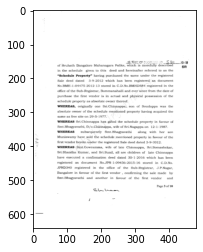

In [22]:
line_thickness = 2
conf_thres = 0.05
im0 = cv2.imread('/home/surya/Desktop/Lending_Kat/test_dir/jpg_files_resized/MDSD-2018/wout_head4.jpg')
im0 =  cv2.resize(im0, (480, 640))

run( im0 = im0, line_thickness = line_thickness, conf_thres = conf_thres)

In [ ]:
@torch.no_grad()
def run(img = img_rgb, 
        weights=ROOT / 'best.pt',  # model.pt path(s)
        source=ROOT / 'data/images',  # file/dir/URL/glob, 0 for webcam
        imgsz=(640,480),  # inference size (pixels)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        ):
#     source = str(source)
#     save_img = not nosave and not source.endswith('.txt')  # save inference images
#     #webcam = source.isnumeric() or source.endswith('.txt') or source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))

#     # Directories
#     save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
#     print(save_dir)
#     (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Initialize
    set_logging()
    device = select_device(device)
    half &= device.type != 'cpu'  # half precision only supported on CUDA

    # Load model
    w = weights[0] if isinstance(weights, list) else weights
    #classify, suffix, suffixes = False, Path(w).suffix.lower(), ['.pt', '.onnx', '.tflite', '.pb', '']]
    classify, suffix, suffixes = False, Path(w).suffix.lower(), ['.pt','']
    check_suffix(w, suffixes)  # check weights have acceptable suffix
    #pt, onnx, tflite, pb, saved_model = (suffix == x for x in suffixes)  # backend booleans
    pt,saved_model = (suffix == x for x in suffixes)  # backend booleans
    stride, names = 64, [f'class{i}' for i in range(1000)]  # assign defaults
    if pt:
        model = attempt_load(weights, map_location=device)  # load FP32 model
        stride = int(model.stride.max())  # model stride
        names = model.module.names if hasattr(model, 'module') else model.names  # get class names
        if half:
            model.half()  # to FP16
#         if classify:  # second-stage classifier
#             modelc = load_classifier(name='resnet50', n=2)  # initialize
#             modelc.load_state_dict(torch.load('resnet50.pt', map_location=device)['model']).to(device).eval()
#     elif onnx:
#         check_requirements(('onnx', 'onnxruntime'))
#         import onnxruntime
#         session = onnxruntime.InferenceSession(w, None)
#     else:  # TensorFlow models
#         check_requirements(('tensorflow>=2.4.1',))
#         import tensorflow as tf
#         if pb:  # https://www.tensorflow.org/guide/migrate#a_graphpb_or_graphpbtxt
#             def wrap_frozen_graph(gd, inputs, outputs):
#                 x = tf.compat.v1.wrap_function(lambda: tf.compat.v1.import_graph_def(gd, name=""), [])  # wrapped import
#                 return x.prune(tf.nest.map_structure(x.graph.as_graph_element, inputs),
#                                tf.nest.map_structure(x.graph.as_graph_element, outputs))

#             graph_def = tf.Graph().as_graph_def()
#             graph_def.ParseFromString(open(w, 'rb').read())
#             frozen_func = wrap_frozen_graph(gd=graph_def, inputs="x:0", outputs="Identity:0")
#         elif saved_model:
#             model = tf.keras.models.load_model(w)
#         elif tflite:
#             interpreter = tf.lite.Interpreter(model_path=w)  # load TFLite model
#             interpreter.allocate_tensors()  # allocate
#             input_details = interpreter.get_input_details()  # inputs
#             output_details = interpreter.get_output_details()  # outputs
#             int8 = input_details[0]['dtype'] == np.uint8  # is TFLite quantized uint8 model
    imgsz = check_img_size(imgsz, s=stride)  # check image size
    print(imgsz)
#     # Dataloader
#     if webcam:
#         view_img = check_imshow()
#         cudnn.benchmark = True  # set True to speed up constant image size inference
#         dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
#         bs = len(dataset)  # batch_size


#     #Dataloader
#     dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
#     bs = 1  # batch_size
    #vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    if pt and device.type != 'cpu':
        model(torch.zeros(1, 3, *imgsz).to(device).type_as(next(model.parameters())))  # run once
    dt, seen = [0.0, 0.0, 0.0], 0
    for path, img, im0s, vid_cap in dataset:
        t1 = time_sync()
#         if onnx:
#             img = img.astype('float32')
#         else:
        img = torch.from_numpy(img).to(device)
        print("<><><><><><><><><><><><><><>><><><><><><><><>><><><><><><><><>><><><>")
        print(img.shape)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img = img / 255.0  # 0 - 255 to 0.0 - 1.0
        if len(img.shape) == 3:
            img = img[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        if pt:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            pred = model(img, augment=augment, visualize=visualize)[0]
#         elif onnx:
#             pred = torch.tensor(session.run([session.get_outputs()[0].name], {session.get_inputs()[0].name: img}))
#         else:  # tensorflow model (tflite, pb, saved_model)
#             imn = img.permute(0, 2, 3, 1).cpu().numpy()  # image in numpy
#             if pb:
#                 pred = frozen_func(x=tf.constant(imn)).numpy()
#             elif saved_model:
#                 pred = model(imn, training=False).numpy()
#             elif tflite:
#                 if int8:
#                     scale, zero_point = input_details[0]['quantization']
#                     imn = (imn / scale + zero_point).astype(np.uint8)  # de-scale
#                 interpreter.set_tensor(input_details[0]['index'], imn)
#                 interpreter.invoke()
#                 pred = interpreter.get_tensor(output_details[0]['index'])
#                 if int8:
#                     scale, zero_point = output_details[0]['quantization']
#                     pred = (pred.astype(np.float32) - zero_point) * scale  # re-scale
#             pred[..., 0] *= imgsz[1]  # x
#             pred[..., 1] *= imgsz[0]  # y
#             pred[..., 2] *= imgsz[1]  # w
#             pred[..., 3] *= imgsz[0]  # h
#             pred = torch.tensor(pred)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

#         # Second-stage classifier (optional)
#         if classify:
#             pred = apply_classifier(pred, modelc, img, im0s)


        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
#             if webcam:  # batch_size >= 1
#                 p, s, im0, frame = path[i], f'{i}: ', im0s[i].copy(), dataset.count
#             else:
            p, s, im0, frame = path, '', im0s.copy(), getattr(dataset, 'frame', 0)
            print("The shape of im0 is ", im0.shape)
            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # img.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # img.txt
            s += '%gx%g ' % img.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            

            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()
                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Write results
                for *xyxy, conf, cls in reversed(det):

#                     if save_txt:  # Write to file
#                         xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
#                         line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
#                         with open(txt_path + '.txt', 'a') as f:
#                             f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        #annotator.box_label(xyxy, label, color=colors(c, True))
#                         if save_crop:
#                             save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)
                        box = xyxy
                        p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
                        cv2.rectangle(im0, p1, p2, (255, 255, 0), 3 )
                plt.imshow(im0)
                plt.show()
            
            # Print time (inference-only)
            print(f'{s}Done. ({t3 - t2:.3f}s)')

            # Stream results
            im0 = annotator.result()
            if view_img:
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
#                 else:  # 'video' or 'stream'
#                     if vid_path[i] != save_path:  # new video
#                         vid_path[i] = save_path
#                         if isinstance(vid_writer[i], cv2.VideoWriter):
#                             vid_writer[i].release()  # release previous video writer
#                         if vid_cap:  # video
#                             fps = vid_cap.get(cv2.CAP_PROP_FPS)
#                             w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#                             h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#                         else:  # stream
#                             fps, w, h = 30, im0.shape[1], im0.shape[0]
#                             save_path += '.mp4'
#                         vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
#                     vid_writer[i].write(im0)
    
    # Print results
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    #print(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        print(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights)  # update model (to fix SourceChangeWarning)

    